In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:52<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:52<00:00, 21.6MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [6]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)


validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
# now we create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics =['accuracy'])

In [11]:
#625 batches = 625*32 = 20000
history = model.fit(train_ds,epochs=10,validation_data =validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 99ms/step - loss: 0.6438 - accuracy: 0.6363 - val_loss: 0.5467 - val_accuracy: 0.7336
Epoch 2/10
625/625 [==============================] - 59s 93ms/step - loss: 0.4983 - accuracy: 0.7562 - val_loss: 0.4671 - val_accuracy: 0.7774
Epoch 3/10
625/625 [==============================] - 57s 89ms/step - loss: 0.3678 - accuracy: 0.8371 - val_loss: 0.4873 - val_accuracy: 0.7890
Epoch 4/10
625/625 [==============================] - 58s 93ms/step - loss: 0.2179 - accuracy: 0.9089 - val_loss: 0.7047 - val_accuracy: 0.7766
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1016 - accuracy: 0.9621 - val_loss: 0.8320 - val_accuracy: 0.7850
Epoch 6/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0607 - accuracy: 0.9787 - val_loss: 1.0664 - val_accuracy: 0.7660
Epoch 7/10
625/625 [==============================] - 57s 91ms/step - loss: 0.0502 - accuracy: 0.9826 - val_loss: 1.0096 - val_accuracy:

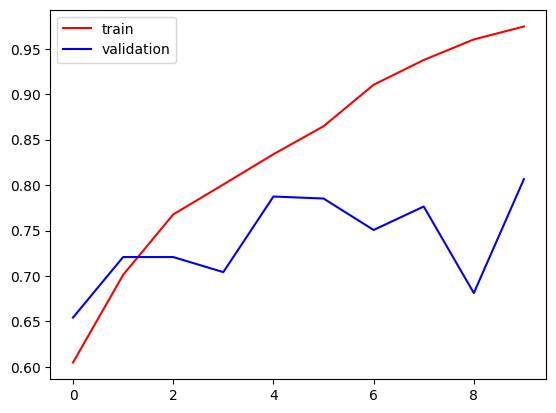

In [25]:

plt.plot(history.history['accuracy'],color = 'red' ,label ='train')
plt.plot(history.history['val_accuracy'],color ='blue',label ='validation')
plt.legend()
plt.show()

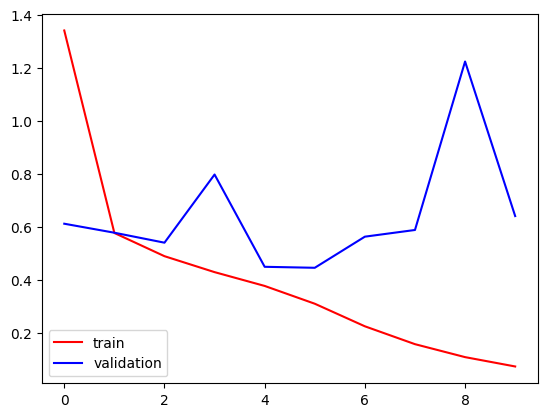

In [26]:
plt.plot(history.history['loss'],color = 'red' ,label ='train')
plt.plot(history.history['val_loss'],color ='blue',label ='validation')
plt.legend()
plt.show()

In [15]:
#our model is overfitting

#methods to reduce overfitting
#Add more Data
#data Augumentation
#L1/L2 regualarizer
#dropout
#batch norm
#reduce complexcitiy

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [19]:

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer ='adam',loss = 'binary_crossentropy',metrics =['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=10,validation_data =validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 112ms/step - loss: 1.3409 - accuracy: 0.6047 - val_loss: 0.6112 - val_accuracy: 0.6542
Epoch 2/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5762 - accuracy: 0.7012 - val_loss: 0.5772 - val_accuracy: 0.7208
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4886 - accuracy: 0.7677 - val_loss: 0.5395 - val_accuracy: 0.7208
Epoch 4/10
625/625 [==============================] - 69s 110ms/step - loss: 0.4283 - accuracy: 0.8007 - val_loss: 0.7969 - val_accuracy: 0.7042
Epoch 5/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3762 - accuracy: 0.8339 - val_loss: 0.4485 - val_accuracy: 0.7874
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3090 - accuracy: 0.8648 - val_loss: 0.4447 - val_accuracy: 0.7852
Epoch 7/10
625/625 [==============================] - 69s 110ms/step - loss: 0.2238 - accuracy: 0.9104 - val_loss: 0.5623 - val_ac

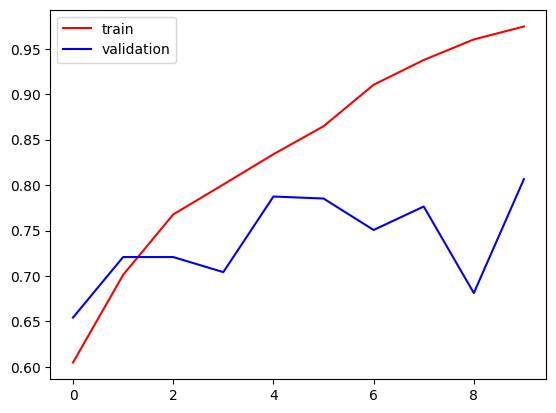

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color = 'red' ,label ='train')
plt.plot(history.history['val_accuracy'],color ='blue',label ='validation')
plt.legend()
plt.show()

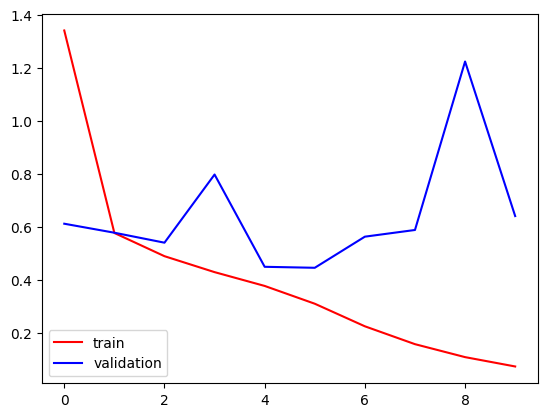

In [28]:
plt.plot(history.history['loss'],color = 'red' ,label ='train')
plt.plot(history.history['val_loss'],color ='blue',label ='validation')
plt.legend()
plt.show()

In [104]:
#prediiction time
import cv2

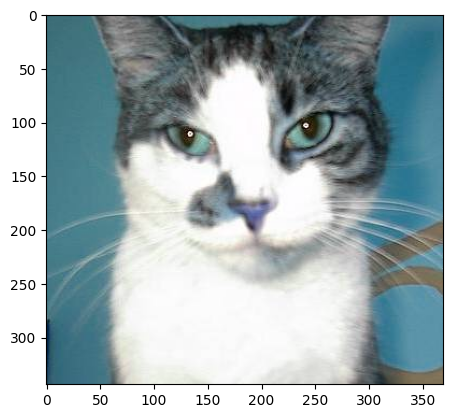

In [109]:
test_image =cv2.imread('/content/test/cats/cat.10487.jpg')
plt.imshow(test_image)

In [110]:
test_image.shape

(344, 369, 3)

In [111]:
test_image = cv2.resize(test_image,(256,256))
test_input = test_image.reshape((1,256,256,3))

In [112]:
model.predict(test_input)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

In [113]:
#now let take dog image

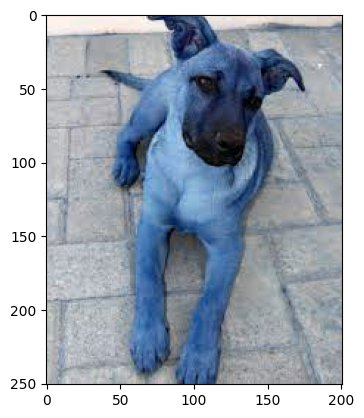

In [99]:
import cv2
test_image1 = cv2.imread('/content/dog2.jpg')
plt.imshow(test_image1)

In [100]:
test_image1.shape

(251, 201, 3)

In [102]:
test_image1 = cv2.resize(test_image1,(256,256))
test_input1 = test_image1.reshape((1,256,256,3))

In [103]:
model.predict(test_input1)

1/1 [==============================] - 0s 20ms/step


array([[1.]], dtype=float32)

In [54]:
#example
